## Import libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.io
%matplotlib inline

__<font size=6 color="green">WISDM</font>__

## Clear the data 

After running this part of the code, we can work with the data from file: ```WISDM_ar_v1.1_raw_cleared.txt```.

In [14]:
f_read = open("../data/WISDM/WISDM_ar_v1.1_raw.txt", "r")
f_write = open("../data/WISDM/WISDM_ar_v1.1_raw_cleared.txt", "w")
for string in f_read.readlines():
    if string[-1] == '\n':
        string = string[:-1]
    if len(string) > 0:
        string_list = string.split(';')
        if len(string_list) > 2:
            for row in string_list[:2]:
                words = row.split(',')
                if len(words) > 5:
                    if len(words[5]) > 0:
                        f_write.write("%s,%s,%s,%s,%s,%s\n" % (words[0], words[1], 
                                                               words[2], words[3], 
                                                               words[4], words[5]))
        else:
            words = string_list[0].split(',')
            if len(words) > 5:
                if len(words[5]) > 0:
                    f_write.write("%s,%s,%s,%s,%s,%s\n" % (words[0], words[1], 
                                                           words[2], words[3], 
                                                           words[4], words[5]))
f_read.close()
f_write.close()

## Read data

Read the data to pandas:  
* ```id_user``` - identification number of the user (from 1 to 36 inclusively);
* ```activity``` - type of activity (our classes: ```['Downstairs', 'Sitting', 'Walking', 'Upstairs', 'Jogging', 'Standing']```);
* ```timestamp``` - time of measurement (in nanoseconds);
* ```x``` - acceleration in $x$ direction;
* ```y``` - acceleration in $y$ direction;
* ```z``` - acceleration in $z$ direction;

In [15]:
data = pd.read_table("../data/WISDM/WISDM_ar_v1.1_raw_cleared.txt", delimiter=',', header=None)
data.columns = ['id_user', 'activity', 'timestamp', 'x', 'y', 'z']
data.head()

,id_user,activity,timestamp,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


Class distribution:

In [16]:
classes = list(set(data['activity']))
for activity in classes:
    nb = np.sum(data['activity'] == activity)
    print("{:<15}{:<9d}{:<5.2f} %".format(activity, nb, 100. * nb / data.shape[0]))
print()
print("Number of objects: {:d}".format(data.shape[0]))

Standing       48395    4.41  %
Walking        424399   38.64 %
Upstairs       122869   11.19 %
Sitting        59939    5.46  %
Jogging        342179   31.16 %
Downstairs     100427   9.14  %
()
Number of objects: 1098208


Example of the data:

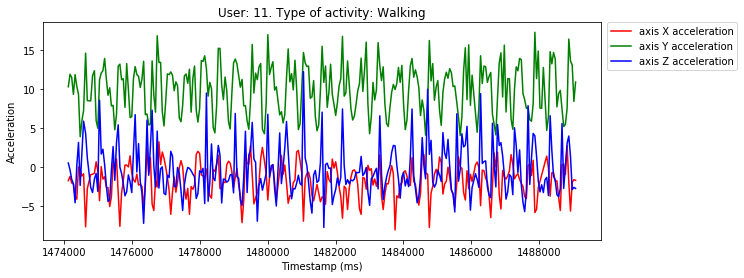

In [17]:
id_user, activity = 11, 'Walking'

mask = (data.loc[:, 'id_user'] == id_user) & (data.loc[:, 'activity'] == activity)
x = np.array(data.loc[mask, 'timestamp'])[:np.min([300, np.sum(mask)])] / 10**6
yx = np.array(data.loc[mask, 'x'])[:np.min([300, np.sum(mask)])]
yy = np.array(data.loc[mask, 'y'])[:np.min([300, np.sum(mask)])]
yz = np.array(data.loc[mask, 'z'])[:np.min([300, np.sum(mask)])]

if np.sum(mask) > 0:
    plt.figure(figsize=(10, 4))
    plt.plot(x, yx, 'r', label='axis X acceleration')
    plt.plot(x, yy, 'g', label='axis Y acceleration')
    plt.plot(x, yz, 'b', label='axis Z acceleration')
    plt.xlabel('Timestamp (ms)')
    plt.ylabel('Acceleration')
    plt.title("User: {}. Type of activity: {}".format(id_user, activity))
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.show()
else:
    print("There is no such data.")

__<font size=6 color="green">UCI-HAD</font>__

## Clear the data 

After running this part of the code, we can work with the data from file: ```USC-HAD_cleared.txt```.

In [18]:
f_write = open("../data/USC-HAD/USC-HAD_cleared.txt", "w")
path = "../data/USC-HAD/original/"
for id_user in range(14):
    path_sbj = path + "Subject" + str(id_user+1)
    filename_list = os.listdir(path_sbj)
    for filename in filename_list:
        data = scipy.io.loadmat(path_sbj + "/" + filename)
        sensor_data = data['sensor_readings']
        activity = data['activity'][0].capitalize()
        for elem in ["Walk", "Stand", "Sit", "Run", "Jump"]:
            if activity.find(elem) != -1:
                word_list = activity.split('-')
                if elem == "Run":
                    word_list[0] = elem + "ning"
                elif elem == "Sit":
                    word_list[0] = elem + "ting"
                else:
                    word_list[0] = elem + "ing"
                if len(word_list) > 1:
                    if (elem == "Walk") & (word_list[1] == "up"):
                        word_list[0] = elem + "ing"
                        word_list[1] = "upstairs"
                    elif (elem == "Walk") & (word_list[1] == "down"):
                        word_list[0] = elem + "ing"
                        word_list[1] = "downstairs"
                activity = '-'.join(word_list)
                break
        words = [id_user + 1, activity, int(data['trial'][0]), 0., 0., 0.]
        for i in range(sensor_data.shape[0]):
            words[3] = sensor_data[i, 0]
            words[4] = sensor_data[i, 1]
            words[5] = sensor_data[i, 2]
            f_write.write("%s,%s,%s,%s,%s,%s\n" % (words[0], words[1], 
                                                   words[2], words[3], 
                                                   words[4], words[5]))
f_write.close()

## Read data

Read the data to pandas:  
* ```id_user``` - identification number of the user (from 1 to 36 inclusively);
* ```activity``` - type of activity (our classes: ```['Downstairs', 'Sitting', 'Walking', 'Upstairs', 'Jogging', 'Standing']```);
* ```timestamp``` - actually it is the number of trial;
* ```x``` - acceleration in $x$ direction;
* ```y``` - acceleration in $y$ direction;
* ```z``` - acceleration in $z$ direction;

In [11]:
data = pd.read_table("../data/USC-HAD/USC-HAD_cleared.txt", delimiter=',', header=None)
data.columns = ['id_user', 'activity', 'timestamp', 'x', 'y', 'z']
data.head()

,id_user,activity,timestamp,x,y,z
0,1,Sleeping,1,-0.653698,0.711878,-0.423886
1,1,Sleeping,1,-0.646831,0.708259,-0.420226
2,1,Sleeping,1,-0.650265,0.711878,-0.423886
3,1,Sleeping,1,-0.646831,0.711878,-0.423886
4,1,Sleeping,1,-0.643397,0.711878,-0.427546


Class distribution:

In [12]:
classes = list(set(data['activity']))
for activity in classes:
    nb = np.sum(data['activity'] == activity)
    print("{:<20}{:<9d}{:<5.2f} %".format(activity, nb, 100. * nb / data.shape[0]))
print()
print("Number of objects: {:d}".format(data.shape[0]))

Standing            236000   8.39  %
Elevator-up         165491   5.89  %
Walking-forward     381400   13.57 %
Sitting             261500   9.30  %
Walking-downstairs  197400   7.02  %
Sleeping            375000   13.34 %
Elevator-down       164999   5.87  %
Walking-upstairs    211800   7.53  %
Jumping             107100   3.81  %
Walking-right       269700   9.59  %
Walking-left        264600   9.41  %
Running             176500   6.28  %
()
Number of objects: 2811490


Example of the data:

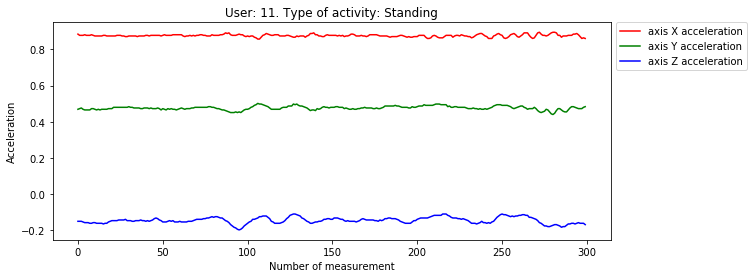

In [9]:
id_user, activity = 11, 'Standing'

mask = (data.loc[:, 'id_user'] == id_user) & (data.loc[:, 'activity'] == activity)
x = [ i for i in range(np.min([300, np.sum(mask)]))]
yx = np.array(data.loc[mask, 'x'])[:np.min([300, np.sum(mask)])]
yy = np.array(data.loc[mask, 'y'])[:np.min([300, np.sum(mask)])]
yz = np.array(data.loc[mask, 'z'])[:np.min([300, np.sum(mask)])]

if np.sum(mask) > 0:
    plt.figure(figsize=(10, 4))
    plt.plot(x, yx, 'r', label='axis X acceleration')
    plt.plot(x, yy, 'g', label='axis Y acceleration')
    plt.plot(x, yz, 'b', label='axis Z acceleration')
    plt.xlabel('Number of measurement')
    plt.ylabel('Acceleration')
    plt.title("User: {}. Type of activity: {}".format(id_user, activity))
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.show()
else:
    print("There is no such data.")